# Exploratory Data Analysis


### Importing libreries

In [1]:
import pandas as pd
import numpy as np
# To work with json
import json

# Visualization libraries
import matplotlib.pylab as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
# To do exploratory data analysis
import seaborn as sns

# Stile for plots
plt.style.use('ggplot')

### Loading the data set

In [2]:
# Import the data from the json file to a dataframe
with open ('/home/bbruno/all_here/python course/vinnie/data/users-data-prod.json', 'r') as file:
    data = json.load(file)

df = pd.json_normalize(data['usersData'])
print("the columns are: ", df.columns)

the columns are:  Index(['userId', 'wines', 'tastingNotes', 'pairings'], dtype='object')


### Data understanding


In [3]:
print(f"1. the data set is compoused of {df.shape[0]} rows and {df.shape[1]} columns\n") #this is df.shape
print(f"2. the data set if of type {type(df)}\n")
print(f"3. the columns are of type \n{df.dtypes}")

1. the data set is compoused of 4504 rows and 4 columns

2. the data set if of type <class 'pandas.core.frame.DataFrame'>

3. the columns are of type 
userId          object
wines           object
tastingNotes    object
pairings        object
dtype: object


## Data preparation


* In this section we would have the data preparation based on the pairings wine-food provided by the users

In [4]:
# Part 1 feedback on parings (matchings)
feedback_data = []
for user_data in data['usersData']:
    for pairing in user_data['pairings']:
        feedback_data.append({
            'userId': user_data['userId'],
            'feedback': pairing['feedbackOnPairing'],
            'wine': pairing['selected']
        })

feedback_df = pd.DataFrame(feedback_data)
feedback_df.head()

,userId,feedback,wine
0,131a3994-a510-4ead-93d0-3d89f06b9602,neutral,sangiovese_red
1,131a3994-a510-4ead-93d0-3d89f06b9602,neutral,carmenere_red
2,131a3994-a510-4ead-93d0-3d89f06b9602,neutral,riesling_white
3,131a3994-a510-4ead-93d0-3d89f06b9602,neutral,chardonnay_white
4,131a3994-a510-4ead-93d0-3d89f06b9602,neutral,nebbiolo_red


In [5]:
print(feedback_df.info())
print(f"the data set has the following columns with null values: \n{feedback_df.isnull().sum()}\n")
#the data has no null values and only stings

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10121 entries, 0 to 10120
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   userId    10121 non-null  object
 1   feedback  10121 non-null  object
 2   wine      10121 non-null  object
dtypes: object(3)
memory usage: 237.3+ KB
None
the data set has the following columns with null values: 
userId      0
feedback    0
wine        0
dtype: int64



In [6]:
print(feedback_df.describe())
print(f"1. The number of users from pairing feedbacks {feedback_df['userId'].nunique()}\n")
print(f"2. The number of wines from pairing feedbacks {feedback_df['wine'].nunique()}\n")
print(f"3. The total number of pairing feedbacks is {feedback_df['feedback'].count()}\n")
print(f"4. the types of pairing feedbacks are {feedback_df['feedback'].unique()}\n")
print(f"5. the top wines from pairing feedbacks are: with the following pairings..\n{feedback_df['wine'].value_counts().head(10)}\n")
print(f"6. the number of pairings feedback by type are: \n{feedback_df['feedback'].value_counts()}\n")
print(f"7. the top 10 users by number of pairings feedbacks are: \n{feedback_df['userId'].value_counts().head(10)}\n")

                                      userId feedback              wine
count                                  10121    10121             10121
unique                                  4037        3                62
top     76b71bb0-6cc9-4168-8a45-bbafc1e9a256  neutral  chardonnay_white
freq                                     102     9811               850
1. The number of users from pairing feedbacks 4037

2. The number of wines from pairing feedbacks 62

3. The total number of pairing feedbacks is 10121

4. the types of pairing feedbacks are ['neutral' 'dislike' 'like']

5. the top wines from pairing feedbacks are: with the following pairings..
chardonnay_white      850
cabernet_franc_red    653
sangiovese_red        606
carignan_red          525
moscato_white         466
prosecco_white        457
riesling_white        444
carmenere_red         423
grenache_red          358
merlot_red            303
Name: wine, dtype: int64

6. the number of pairings feedback by type are: 
neutral  

* plot to check missing values

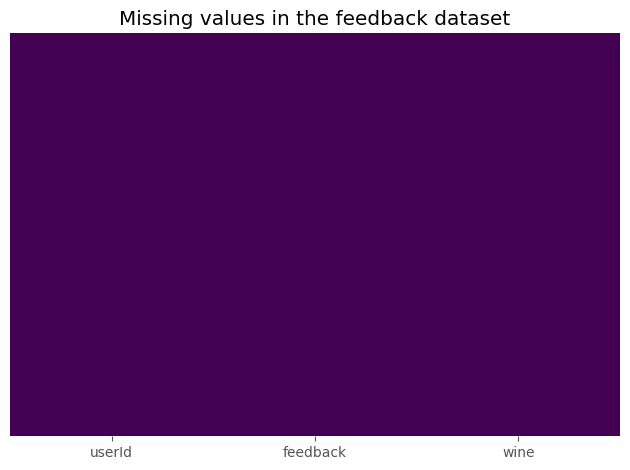

In [7]:
# Dataset has no missing values
sns.heatmap(feedback_df.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')
plt.title('Missing values in the feedback dataset')
# Adjust the padding
plt.tight_layout()
#save
plt.savefig('/home/bbruno/all_here/python course/vinnie/img/missing_values_feedback.png')
plt.show()

In [8]:
#convert "feedback" from string to int
feedback_df['feedback'] = feedback_df['feedback'].map({'neutral': 0, 'like': 1, 'dislike': -1}).astype(int)
print(feedback_df['feedback'].unique())
print(feedback_df['feedback'].value_counts())

[ 0 -1  1]
 0    9811
 1     246
-1      64
Name: feedback, dtype: int64


## plots

/tmp/ipykernel_3389/2398242493.py:14: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


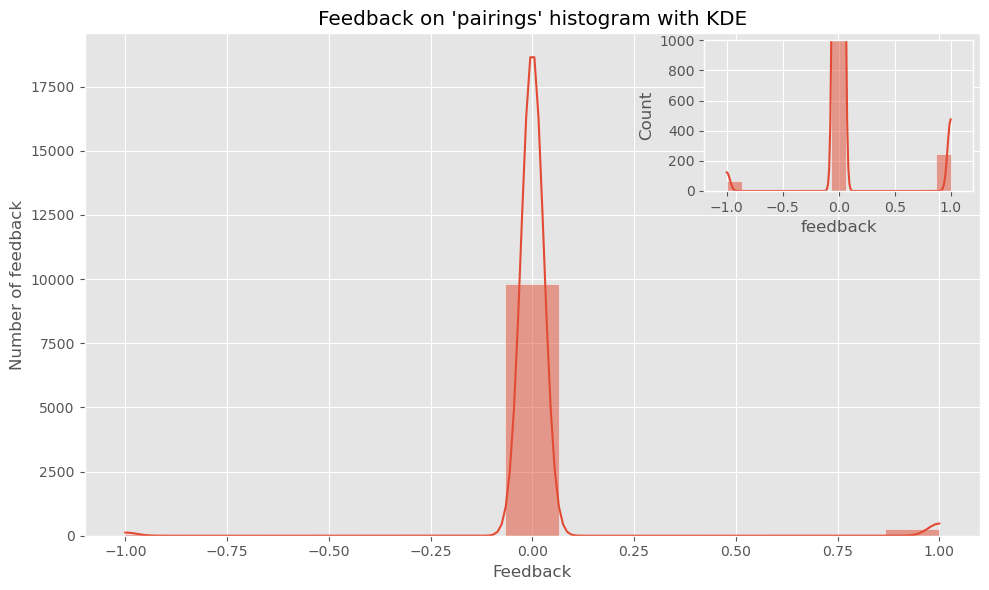

In [9]:
# Create the histogram with a KDE
plt.figure(figsize=(10, 6))
ax = sns.histplot(x='feedback', data=feedback_df, kde=True)
ax.set_title('Feedback on \'pairings\' histogram with KDE')
ax.set_xlabel('Feedback')
ax.set_ylabel('Number of feedback')

# Create an inset axes for the zoomed-in region
axins = inset_axes(ax, width="30%", height="30%", loc='upper right')
sns.histplot(x='feedback', data=feedback_df, kde=True, ax=axins)
axins.set_xlim(-1.2, 1.2)  # Adjust these values to zoom in more on the x-axis
axins.set_ylim(0, 1000)  # Adjust these values to zoom in more on the y-axis
# Adjust the padding
plt.tight_layout()
#save
plt.savefig('/home/bbruno/all_here/python course/vinnie/img/feedback_on_pairings.png')
plt.show()

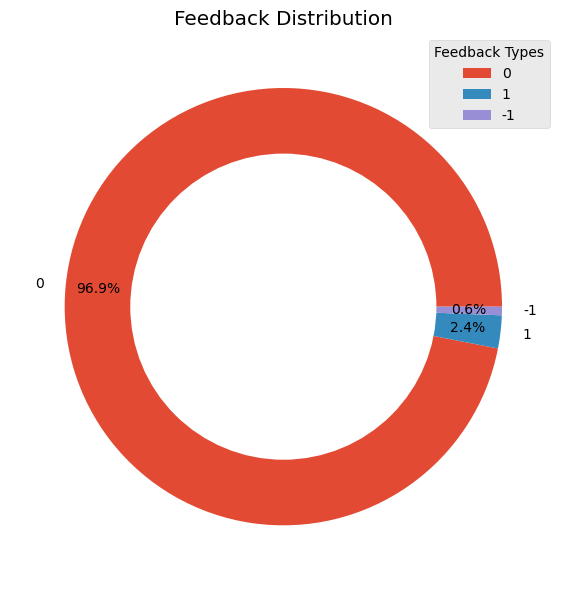

In [10]:
# Assuming 'feedback' column contains the categories you want to plot
feedback_counts = feedback_df['feedback'].value_counts()

plt.figure(figsize=(10, 6))
plt.pie(feedback_counts, labels=feedback_counts.index, autopct='%1.1f%%', pctdistance=0.85)

# Draw a white circle at the center
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Feedback Distribution')
plt.legend(title="Feedback Types", loc="upper right")
# Adjust the padding
plt.tight_layout()
# Save
plt.savefig('/home/bbruno/all_here/python course/vinnie/img/feedback_distribution.png')
plt.show()